## Pre-trained ImageNet networks
Modified code from <a href="https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/" target="_blank">PyImageSearch</a>.

### ImageNet dataset

<img src="images/cifar10.png" width=500>

### VGG 19 architecture

<img src="images/ConvNet_VGG19.jpeg" width=600>

### Visualization of ConvNet filters 

<img src="images/ConvNet_weights.jpeg">

## Using pre-trained networks in Keras

In [3]:
# import the necessary packages
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from IPython.display import Image

import numpy as np

# Ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# available models in Keras
MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception, # TensorFlow ONLY
    "resnet": ResNet50
}

def load_model(model):
    # check that the model is valid
    if model not in MODELS.keys():
        raise AssertionError("Invalid model {}".format(model))

    # initialize the input image shape (224x224 pixels) along with
    # the pre-processing function (this might need to be changed
    # based on which model we use to classify our image)
    inputShape = (224, 224)
    preprocess = imagenet_utils.preprocess_input

    # if we are using the InceptionV3 or Xception networks, then we
    # need to set the input shape to (299x299) [rather than (224x224)]
    # and use a different image processing function
    if model in ("inception", "xception"):
        inputShape = (299, 299)
        preprocess = preprocess_input

    # load our the network weights from disk
    print("Loading model {}".format(model))
    Network = MODELS[model]
    model = Network(weights="imagenet")
    return model,inputShape,preprocess

def classify_image(image_path):
    # load the input image using the Keras helper utility while ensuring
    # the image is resized to `inputShape`, the required input dimensions
    # for the ImageNet pre-trained network
    print("Loading and pre-processing image '{}'".format(image_path))
    image = load_img(image_path, target_size=inputShape)
    image = img_to_array(image)

    # our input image is now represented as a NumPy array of shape
    # (inputShape[0], inputShape[1], 3) however we need to expand the
    # dimension by making the shape (1, inputShape[0], inputShape[1], 3)
    # so we can pass it through thenetwork
    image = np.expand_dims(image, axis=0)

    # pre-process the image using the appropriate function based on the
    # model that has been loaded (i.e., mean subtraction, scaling, etc.)
    image = preprocess(image)

    # classify the image
    print("Classifying image with model '{}'".format(model.name))
    preds = model.predict(image)
    P = imagenet_utils.decode_predictions(preds)

    # loop over the predictions and display the rank-5 predictions +
    # probabilities to our terminal
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
        print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

model,inputShape,preprocess = load_model("xception")

Using TensorFlow backend.


Loading model xception


Loading and pre-processing image 'images/soccer_ball.jpg'
Classifying image with model 'xception'
1. soccer_ball: 92.84%
2. volleyball: 2.36%
3. rugby_ball: 0.74%
4. croquet_ball: 0.07%
5. balloon: 0.07%


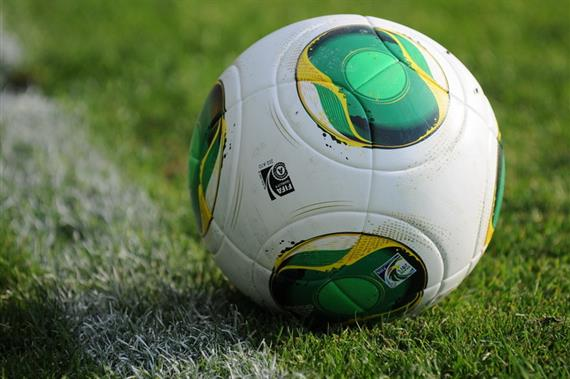

In [4]:
img = "images/soccer_ball.jpg"
classify_image(img)
Image(img)

Loading and pre-processing image 'images/beagle.jpg'
Classifying image with model 'xception'
1. beagle: 88.23%
2. Walker_hound: 2.65%
3. English_foxhound: 1.71%
4. bluetick: 0.24%
5. EntleBucher: 0.14%


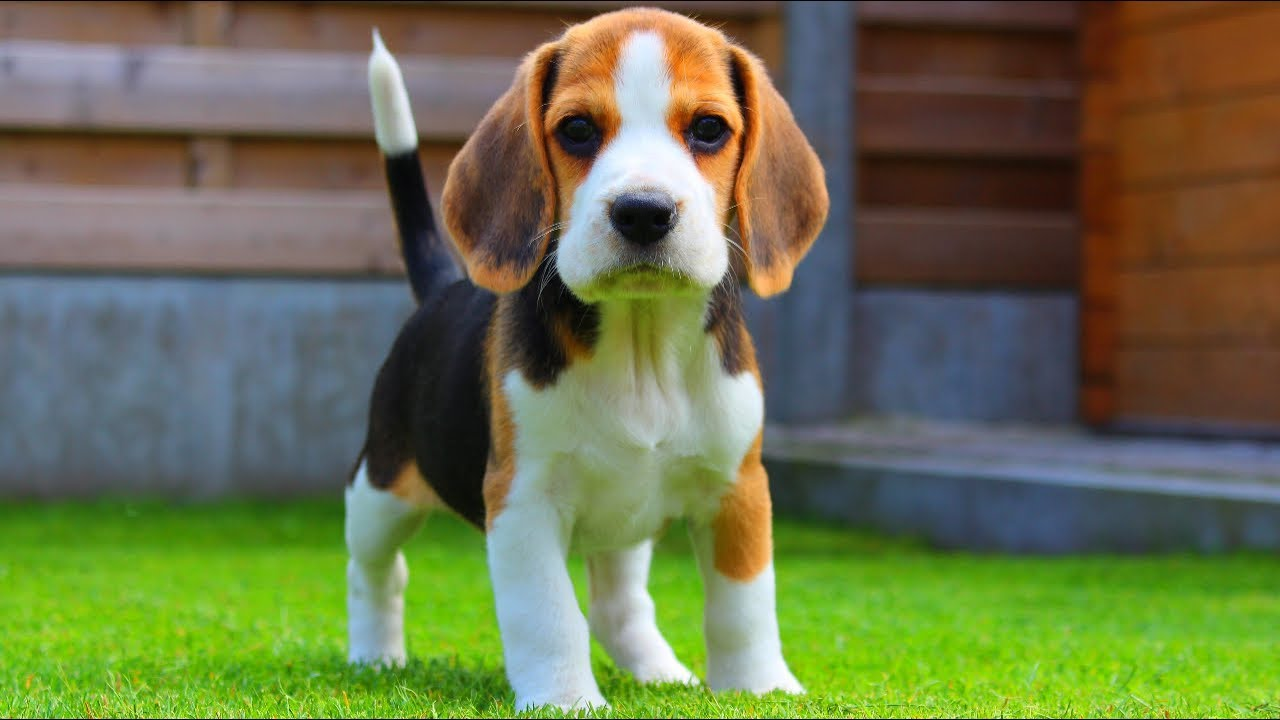

In [5]:
img = "images/beagle.jpg"
classify_image(img)
Image(img, width=800)

Loading and pre-processing image 'images/kalmar_slott.jpg'
Classifying image with model 'xception'
1. castle: 94.38%
2. palace: 0.49%
3. monastery: 0.30%
4. church: 0.05%
5. dishrag: 0.03%


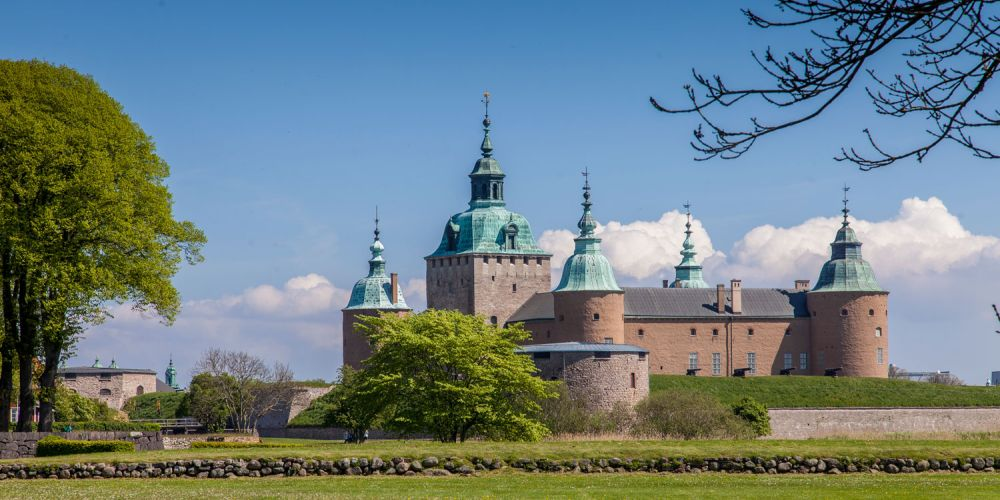

In [6]:
img = "images/kalmar_slott.jpg"
classify_image(img)
Image(img, width=800)

Loading and pre-processing image 'images/bmw.png'
Classifying image with model 'xception'
1. convertible: 94.89%
2. sports_car: 1.86%
3. amphibian: 0.21%
4. car_wheel: 0.04%
5. speedboat: 0.04%


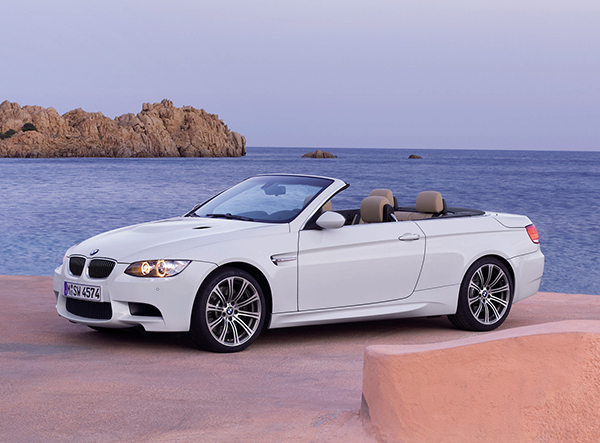

In [7]:
img = "images/bmw.png"
classify_image(img)
Image(img, width=800)

Loading and pre-processing image 'images/office.png'
Classifying image with model 'xception'
1. table_lamp: 69.52%
2. studio_couch: 6.83%
3. lampshade: 5.48%
4. pillow: 5.26%
5. window_shade: 1.57%


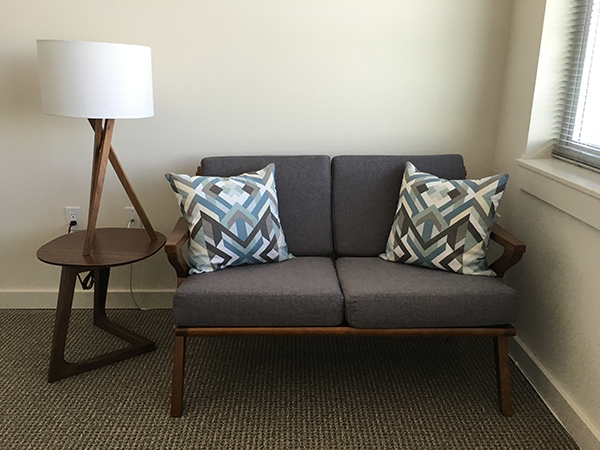

In [8]:
img = "images/office.png"
classify_image(img)
Image(img, width=800)

Loading and pre-processing image 'images/boat.png'
Classifying image with model 'xception'
1. wreck: 93.17%
2. seashore: 0.59%
3. gondola: 0.17%
4. sea_lion: 0.14%
5. amphibian: 0.12%


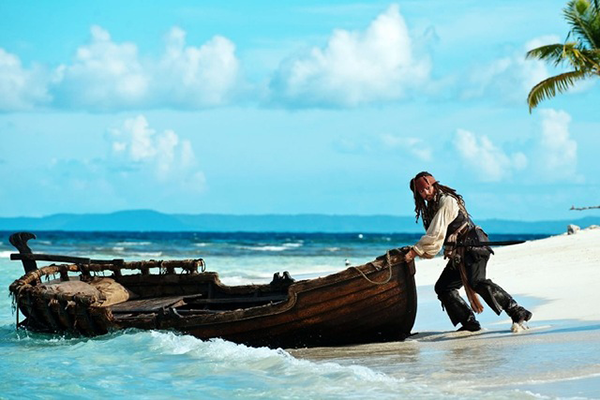

In [9]:
img = "images/boat.png"
classify_image(img)
Image(img, width=800)

Loading and pre-processing image 'images/weird_cat_1.jpg'
Classifying image with model 'xception'
1. washbasin: 64.66%
2. bathtub: 7.89%
3. tub: 4.91%
4. toilet_seat: 2.39%
5. English_springer: 1.99%


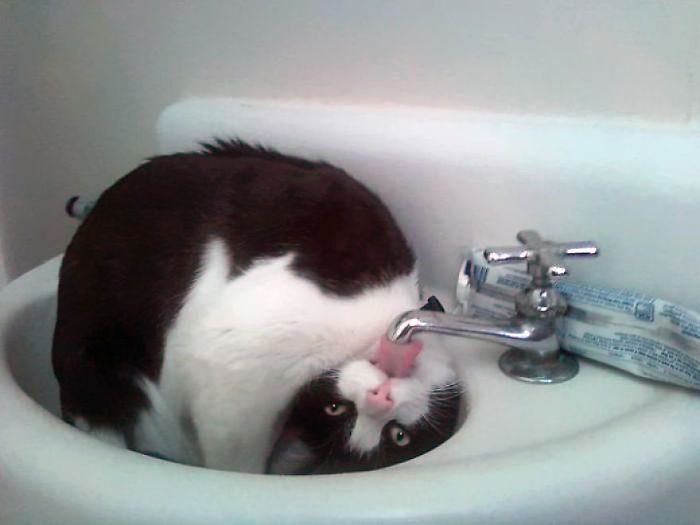

In [10]:
img = "images/weird_cat_1.jpg"
classify_image(img)
Image(img, width=800)

Loading and pre-processing image 'images/car_water.jpg'
Classifying image with model 'xception'
1. paddle: 16.48%
2. amphibian: 8.15%
3. canoe: 6.60%
4. lifeboat: 5.83%
5. lakeside: 5.81%


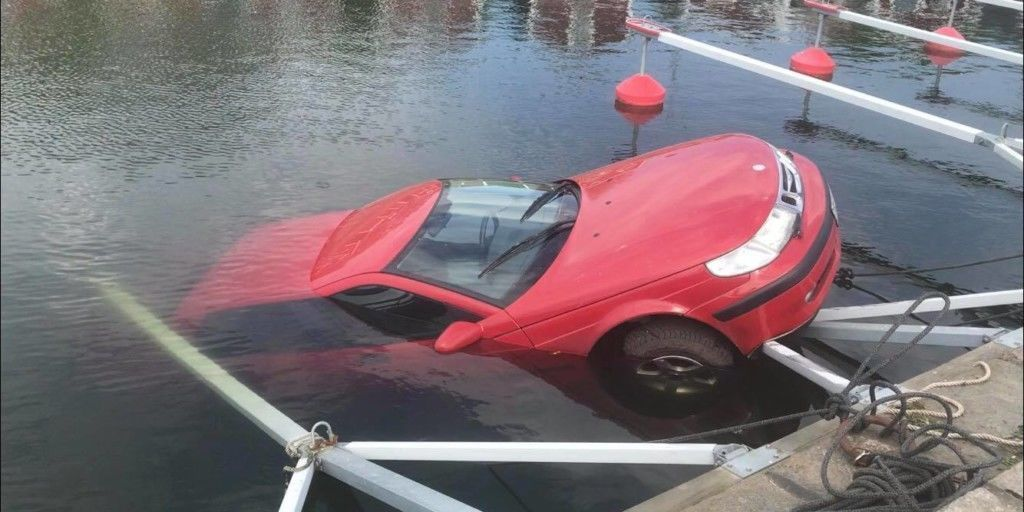

In [11]:
img = "images/car_water.jpg"
classify_image(img)
Image(img, width=800)